# Lab Week 3 - Logistic Regression

## EXERCISE: Predicting Survival on the Titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [1]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
titanic = pd.read_csv('../../data/titanic.csv', index_col='PassengerId')

In [2]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

In [3]:
# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# TASK 4: fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
print(logreg.fit(X_train, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [5]:
# TASK 5: make predictions on testing set and calculate accuracy
# compare y.predclass to y_test and compare for accurancy  
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))
# the result is correct approx 66 % of the time, see print output

0.668161434978


In [7]:
# TASK 6: add Age as a feature and calculate testing accuracy
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
feature_cols = ['Pclass', 'Parch', 'Age']
#feature_cols = ['Pclass', 'Parch', 'Age', 'SibSp']
# how change sex to numeric to use in this ? feature_cols = ['Pclass', 'Age', 'Sex']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))


0.686098654709


In [8]:
# TASK 7 : Confusion Matrix
from sklearn import metrics
prds = logreg.predict(X)
print (metrics.confusion_matrix(y_test, y_pred_class))


[[112  16]
 [ 54  41]]


In [9]:
#Later try to make that better above then do ROC


In [13]:
# TASK 8: Generate the ROC Curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

#fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_class)
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_class)

roc_auc_score(y_test, y_pred_class)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_class)
roc_auc = metrics.auc(fpr, tpr)



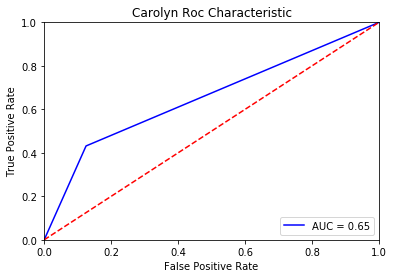

In [14]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Carolyn Roc Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# TASK 9: What variables should we include in the model to improve it?
#  added Sibsp and was little worse, can't add strings? so how do you use gender sex column

In [2]:
# Task 10: Try a different classification algorithm like Naive Bayes or Nearest Neighbours
from sklearn.neighbors import NearestNeighbors
#nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(x)

#print(nbrs)
#from sklearn import neighbors
#knn = neighbors.KNeighborsClassi er(n_neighbors=5)
#y_test, y_pred_class = nbrs.kneighbors(X)
#nbrs.kneighbors_graph(X).toarray()

NameError: name 'x' is not defined